In [ ]:
import pandas as pd

df_cols = ['Fecha_orden','ID_orden','ID_producto','Cantidad','ID_categoria','Descripcion_categoria','ID_marca','Precio_USD','ID_usuario','Genero_comprador','Color','Metal','Gema']
df = pd.read_csv('jewelry.csv',names=df_cols )
df.head(100)

,Fecha_orden,ID_orden,ID_producto,Cantidad,ID_categoria,Descripcion_categoria,ID_marca,Precio_USD,ID_usuario,Genero_comprador,Color,Metal,Gema
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-12-19 03:20:29 UTC,1937513495830463001,1313599513520242876,1,1.806829e+18,jewelry.bracelet,0.0,335.48,1.515916e+18,NaN,yellow,gold,garnet
96,2018-12-19 16:23:01 UTC,1937907359061901878,1857928178572460326,1,1.806829e+18,jewelry.ring,1.0,200.85,1.515916e+18,NaN,white,gold,diamond
97,2018-12-19 16:53:23 UTC,1937922645941027618,1870506514704236918,1,1.806829e+18,jewelry.ring,1.0,150.55,1.515916e+18,f,red,gold,diamond
98,2018-12-20 12:24:45 UTC,1938512213568389226,1806829198015201339,1,1.806829e+18,jewelry.ring,2.0,171.25,1.515916e+18,NaN,red,gold,fianit


# ETL

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha_orden            95911 non-null  object 
 1   ID_orden               95911 non-null  int64  
 2   ID_producto            95911 non-null  int64  
 3   Cantidad               95911 non-null  int64  
 4   ID_categoria           90559 non-null  float64
 5   Descripcion_categoria  85978 non-null  object 
 6   ID_marca               91126 non-null  float64
 7   Precio_USD             90559 non-null  float64
 8   ID_usuario             90559 non-null  float64
 9   Genero_comprador       47743 non-null  object 
 10  Color                  88251 non-null  object 
 11  Metal                  90449 non-null  object 
 12  Gema                   61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [ ]:
#Reviso cuantos datos tiene NaN
df.isna().sum()

Fecha_orden                  0
ID_orden                     0
ID_producto                  0
Cantidad                     0
ID_categoria              5352
Descripcion_categoria     9933
ID_marca                  4785
Precio_USD                5352
ID_usuario                5352
Genero_comprador         48168
Color                     7660
Metal                     5462
Gema                     34058
dtype: int64

In [ ]:
#Elimino Cantidad, por lo general solo se compra una unidad de cada producto
df.drop('Cantidad',axis=1, inplace=True)

In [ ]:
#Cuantos registros no tienen el precio de la compra?
df.Precio_USD.isna().sum()

5352

In [ ]:
#Elimino todos los registros que no sean nan y tengan un id de usuario asociado
new_df = df[df['Precio_USD'].notna() & df['ID_usuario'].notna()]

In [ ]:
#agrego la categoria otro para productos que no especificaron la categoria
new_df.Descripcion_categoria.fillna('other', inplace=True)

<ipython-input-8-c0835bc0b3c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.Descripcion_categoria.fillna('other', inplace=True)


In [ ]:
new_df.Descripcion_categoria.value_counts()

jewelry.earring       29052
jewelry.ring          28300
jewelry.pendant       13088
other                  9933
jewelry.bracelet       6188
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
jewelry.stud             12
Name: Descripcion_categoria, dtype: int64

In [ ]:
new_df['ID_marca'].fillna('-1',inplace=True)

<ipython-input-22-751e241ed488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ID_marca'].fillna('-1',inplace=True)


In [ ]:
new_df['Gema'].unique()

array(['diamond', 'desconocido', 'sapphire', 'amethyst', 'fianit',
       'pearl', 'quartz', 'topaz', 'garnet', 'quartz_smoky', 'ruby',
       'agate', 'mix', 'citrine', 'emerald', 'amber', 'chrysolite',
       'chrysoprase', 'nanocrystal', 'turquoise', 'sitall',
       'corundum_synthetic', 'coral', 'onyx', 'nacre', 'spinel',
       'tourmaline', 'emerald_geothermal', 'garnet_synthetic',
       'rhodolite', 'sapphire_geothermal'], dtype=object)

In [ ]:
#para los casos de nan en color, gema y metal se agregara la etiqueta desconocido
for i in ('Color','Metal','Gema'):
    if i == 'Color':
        new_df[i].fillna('color_desconocido',inplace=True)
    else:
        new_df[i].fillna('desconocido',inplace=True)

<ipython-input-24-c0f5a1deb9e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i].fillna('color_desconocido',inplace=True)
<ipython-input-24-c0f5a1deb9e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[i].fillna('desconocido',inplace=True)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha_orden            90559 non-null  object 
 1   ID_orden               90559 non-null  int64  
 2   ID_producto            90559 non-null  int64  
 3   ID_categoria           90559 non-null  float64
 4   Descripcion_categoria  90559 non-null  object 
 5   ID_marca               90559 non-null  object 
 6   Precio_USD             90559 non-null  float64
 7   ID_usuario             90559 non-null  float64
 8   Genero_comprador       47743 non-null  object 
 9   Color                  90559 non-null  object 
 10  Metal                  90559 non-null  object 
 11  Gema                   90559 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


In [ ]:
new_df.head(10)

,Fecha_orden,ID_orden,ID_producto,ID_categoria,Descripcion_categoria,ID_marca,Precio_USD,ID_usuario,Genero_comprador,Color,Metal,Gema
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,NaN,yellow,gold,desconocido
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
5,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,desconocido
6,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,NaN,red,gold,diamond
7,2018-12-02 22:16:20 UTC,1925764002260976330,1835566854106513435,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit
8,2018-12-03 07:03:49 UTC,1926029494397698277,1811798112444875309,1.806829e+18,jewelry.pendant,2.0,60.27,1.515916e+18,f,red,gold,pearl
9,2018-12-03 09:48:34 UTC,1926112416450478161,1836278824443052965,1.806829e+18,jewelry.earring,1.0,217.40,1.515916e+18,NaN,red,gold,diamond


## Análisis exploratorio


In [ ]:
print(new_df.Metal.value_counts())


gold           89082
silver          1365
desconocido      110
platinum           2
Name: Metal, dtype: int64


<Axes: xlabel='count', ylabel='Gema'>

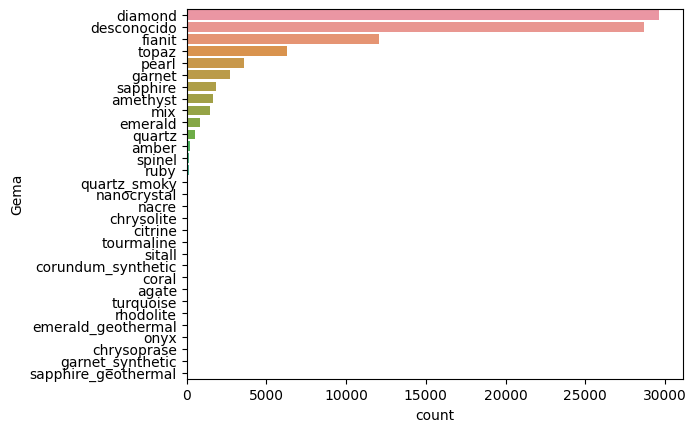

In [ ]:
import seaborn as sns
sns.countplot(data = new_df, y = 'Gema', order = new_df['Gema'].value_counts().index)

<Axes: xlabel='count', ylabel='Descripcion_categoria'>

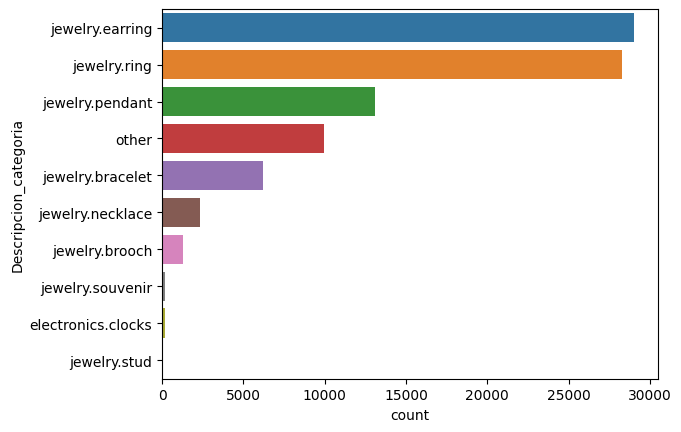

In [ ]:
sns.countplot(data = new_df, y = 'Descripcion_categoria', order = new_df['Descripcion_categoria'].value_counts().index)

red                  69511
white                15286
yellow                3388
color_desconocido     2308
unknown-color           64
black                    2
Name: Color, dtype: int64


<Axes: xlabel='count', ylabel='Color'>

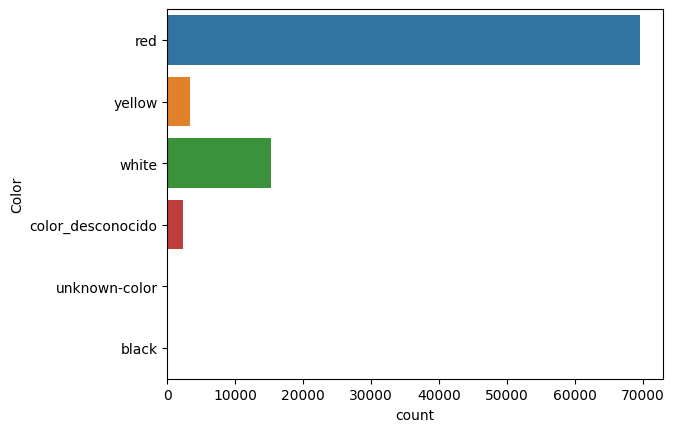

In [ ]:
print(new_df.Color.value_counts())
sns.countplot(y ='Color', data = new_df)

<Axes: xlabel='ID_marca', ylabel='count'>

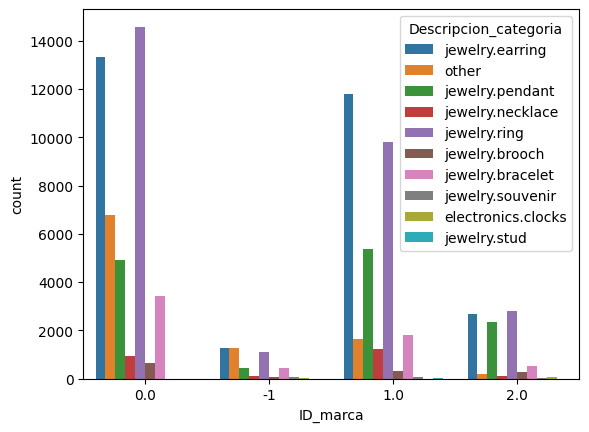

In [ ]:
sns.countplot(x ='ID_marca', hue = "Descripcion_categoria", data = new_df[new_df['ID_marca'].astype(int)<= 2])


# Predicción con DARTS

In [ ]:
!pip install 'u8darts[all]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.0/785.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.1 MB/s eta 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import darts
from darts import TimeSeries
from datetime import datetime

jew_df = new_df[['Fecha_orden', 'Precio_USD']]

jew_df['Fecha_orden'] = jew_df.Fecha_orden.apply(lambda x : x[:10])
jew_df['Fecha_orden'] = jew_df['Fecha_orden'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print(jew_df)

def sumar_ventas_mensuales(dataframe):
    # Convertir la columna 'Fecha_orden' a formato de fecha
    dataframe['Fecha_orden'] = pd.to_datetime(dataframe['Fecha_orden'])
    # Agrupar por mes y sumar las ventas mensuales
    ventas_mensuales = dataframe.groupby(dataframe['Fecha_orden'].dt.to_period("M"))['Precio_USD'].sum().reset_index()

    ventas_mensuales['Fecha_orden'] = ventas_mensuales['Fecha_orden'].dt.strftime('%Y-%m-01')

    return ventas_mensuales


ventas_mensuales = sumar_ventas_mensuales(jew_df)

# Imprimir el nuevo DataFrame con las ventas mensuales
print(ventas_mensuales)
# Save the new DataFrame to a CSV file
ventas_mensuales.to_csv('jewelry_price_date.csv', index=False)

<ipython-input-34-dd242115822a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jew_df['Fecha_orden'] = jew_df.Fecha_orden.apply(lambda x : x[:10])
<ipython-input-34-dd242115822a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jew_df['Fecha_orden'] = jew_df['Fecha_orden'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


      Fecha_orden  Precio_USD
0      2018-12-01      561.51
1      2018-12-01      212.14
2      2018-12-02       54.66
3      2018-12-02       88.90
4      2018-12-02      417.67
...           ...         ...
95905  2021-12-01      134.29
95907  2021-12-01      229.99
95908  2021-12-01      630.00
95909  2021-12-01       83.42
95910  2021-12-01       97.12

[90559 rows x 2 columns]
   Fecha_orden  Precio_USD
0   2018-12-01    33935.77
1   2019-01-01   191471.91
2   2019-02-01   240286.89
3   2019-03-01   216889.54
4   2019-04-01   229081.68
5   2019-05-01   215996.98
6   2019-06-01   239078.28
7   2019-07-01   337639.68
8   2019-08-01   407761.17
9   2019-09-01   244540.37
10  2019-10-01   498325.91
11  2019-11-01   710199.42
12  2019-12-01   733408.56
13  2020-01-01   582004.31
14  2020-02-01   679953.97
15  2020-03-01   630131.55
16  2020-04-01   164786.80
17  2020-05-01   181169.27
18  2020-06-01   461899.26
19  2020-07-01   768669.90
20  2020-08-01  1024644.17
21  2020-09-01   855

<ipython-input-34-dd242115822a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Fecha_orden'] = pd.to_datetime(dataframe['Fecha_orden'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_orden  37 non-null     object 
 1   Precio_USD   37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_orden  37 non-null     datetime64[ns]
 1   Precio_USD   37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 720.0 bytes
             Precio_USD
Fecha_orden            
2018-12-01     33935.77
2019-01-01    191471.91
2019-02-01    240286.89
2019-03-01    216889.54
2019-04-01    229081.68
2019-05-01    215996.98
2019-06-01    239078.28
2019-07-01    337639.68
2019-08-01    407761.17
2019-09-01    244540.37
2019-10-01    498325.91

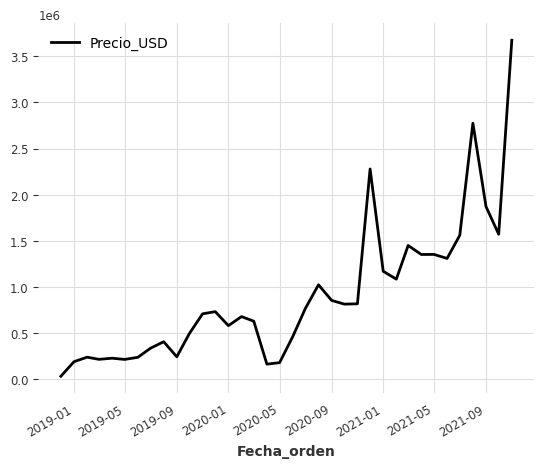

In [ ]:
import darts as ds

# Load the dataset
df = pd.read_csv('jewelry_price_date.csv')
df.info()

df['Fecha_orden'] = df.Fecha_orden.apply(lambda x : x[:10])
df['Fecha_orden'] = df['Fecha_orden'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df.info()
df.index = df['Fecha_orden']
del df['Fecha_orden']
print(df)
df = df.drop(df.index[-1])
#df.info()
series = TimeSeries.from_dataframe(df, value_cols='Precio_USD')
series.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0   2.204921              Test Statistics
1   0.998887                      p-value
2  10.000000             No. of lags used
3  25.000000  Number of observations used
4  -3.723863          critical value (1%)
5  -2.986489          critical value (5%)
6  -2.632800         critical value (10%)


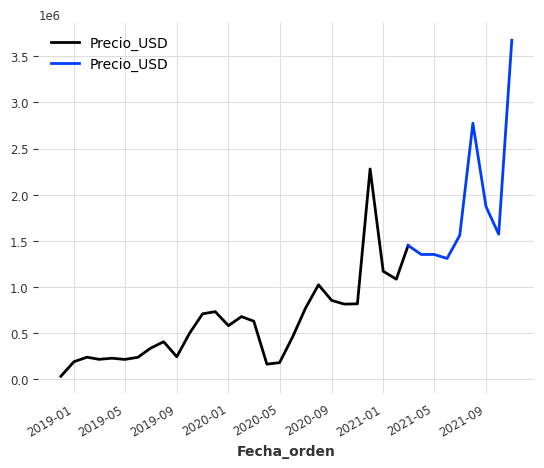

In [ ]:
train, val = series[:-8], series[-9:]
train.plot()
val.plot()
plt.show()

In [ ]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta
from darts.metrics import mape

def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("El modelo {} obtiene MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

El modelo ExponentialSmoothing() obtiene MAPE: 37.00%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


El modelo TBATS() obtiene MAPE: 16.80%
El modelo AutoARIMA() obtiene MAPE: 22.59%
El modelo Theta() obtiene MAPE: 18.84%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
# Buscar el mejor parámetro theta probando 50 valores diferentes
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_

In [ ]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "El MAPE es: {:.2f}, con theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

El MAPE es: 17.94, con theta = 3.020408163265305.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='Fecha_orden'>

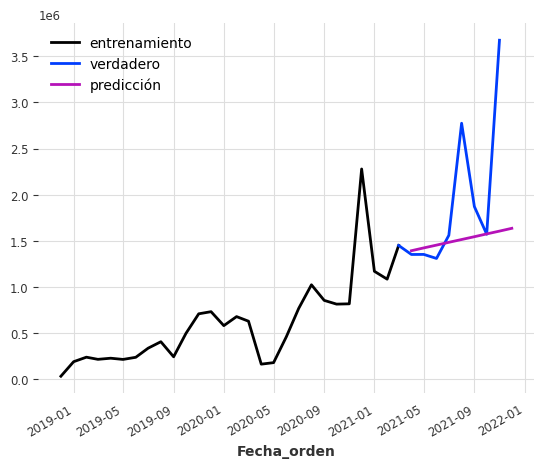

In [ ]:
train.plot(label="entrenamiento")
val.plot(label="verdadero")
pred_best_theta.plot(label="predicción")

# Aproximación con LSTM

In [ ]:
from datetime import datetime

print(jew_df)

      Fecha_orden  Precio_USD
0      2018-12-01      561.51
1      2018-12-01      212.14
2      2018-12-02       54.66
3      2018-12-02       88.90
4      2018-12-02      417.67
...           ...         ...
95905  2021-12-01      134.29
95907  2021-12-01      229.99
95908  2021-12-01      630.00
95909  2021-12-01       83.42
95910  2021-12-01       97.12

[90559 rows x 2 columns]


In [ ]:
sales_df =  pd.pivot_table(jew_df,
                 index= 'Fecha_orden' ,
                 values= 'Precio_USD'  ,
                 aggfunc= 'sum' ).reset_index()

sales_df.sort_values('Fecha_orden',inplace=True)
sales_df.head()

,Fecha_orden,Precio_USD
0,2018-12-01,773.65
1,2018-12-02,897.47
2,2018-12-03,978.85
3,2018-12-04,3486.05
4,2018-12-05,1246.58


     Fecha_orden  Precio_USD  Time
0     2018-12-01      773.65     0
1     2018-12-02      897.47     1
2     2018-12-03      978.85     2
3     2018-12-04     3486.05     3
4     2018-12-05     1246.58     4
...          ...         ...   ...
1078  2021-11-27   206071.70  1078
1079  2021-11-28   186474.59  1079
1080  2021-11-29   219555.01  1080
1081  2021-11-30   197417.90  1081
1082  2021-12-01    60113.20  1082

[1083 rows x 3 columns]


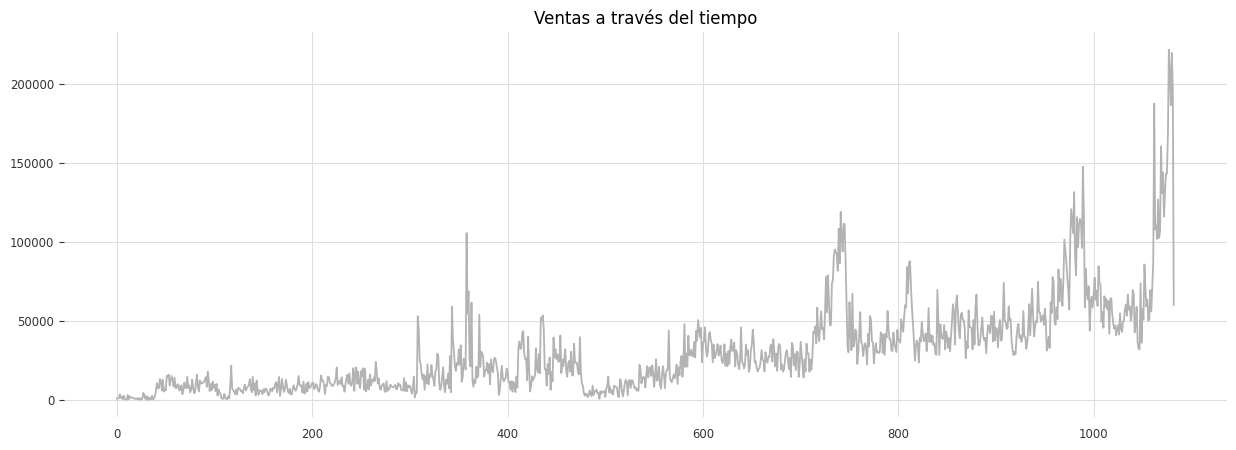

In [ ]:
sales_df['Time'] = np.arange(len(sales_df.index))
print(sales_df)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sales_df['Time'], sales_df["Precio_USD"],  color='0.7')
ax.set_title('Ventas a través del tiempo');

In [ ]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
window = 30
lag = 60
series = series_to_supervised(sales_df.drop('Fecha_orden', axis=1), window=window, lag=lag)
series1 = series_to_supervised(sales_df.drop('Fecha_orden', axis=1), window=window, lag=lag)
series.head()

,Precio_USD(t-30),Time(t-30),Precio_USD(t-29),Time(t-29),Precio_USD(t-28),Time(t-28),Precio_USD(t-27),Time(t-27),Precio_USD(t-26),Time(t-26),...,Precio_USD(t-3),Time(t-3),Precio_USD(t-2),Time(t-2),Precio_USD(t-1),Time(t-1),Precio_USD(t),Time(t),Precio_USD(t+60),Time(t+60)
30,773.65,0.0,897.47,1.0,978.85,2.0,3486.05,3.0,1246.58,4.0,...,4318.76,27.0,3234.17,28.0,642.99,29.0,2355.89,30,12764.49,90.0
31,897.47,1.0,978.85,2.0,3486.05,3.0,1246.58,4.0,1922.62,5.0,...,3234.17,28.0,642.99,29.0,2355.89,30.0,42.31,31,14353.13,91.0
32,978.85,2.0,3486.05,3.0,1246.58,4.0,1922.62,5.0,442.60,6.0,...,642.99,29.0,2355.89,30.0,42.31,31.0,1909.46,32,8185.48,92.0
33,3486.05,3.0,1246.58,4.0,1922.62,5.0,442.60,6.0,2589.26,7.0,...,2355.89,30.0,42.31,31.0,1909.46,32.0,51.92,33,17748.04,93.0
34,1246.58,4.0,1922.62,5.0,442.60,6.0,2589.26,7.0,458.07,8.0,...,42.31,31.0,1909.46,32.0,51.92,33.0,1045.02,34,12493.57,94.0


In [ ]:
from sklearn.model_selection import train_test_split

lag_size= lag

# Label
labels_col = 'Precio_USD(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)
print(series)
X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
print('Test set shape', X_test.shape)
X_train.head()

      Precio_USD(t-30)  Time(t-30)  Precio_USD(t-29)  Time(t-29)  \
30              773.65         0.0            897.47         1.0   
31              897.47         1.0            978.85         2.0   
32              978.85         2.0           3486.05         3.0   
33             3486.05         3.0           1246.58         4.0   
34             1246.58         4.0           1922.62         5.0   
...                ...         ...               ...         ...   
1018          96078.72       988.0         147542.79       989.0   
1019         147542.79       989.0         116938.02       990.0   
1020         116938.02       990.0          58606.05       991.0   
1021          58606.05       991.0          82913.78       992.0   
1022          82913.78       992.0          68006.16       993.0   

      Precio_USD(t-28)  Time(t-28)  Precio_USD(t-27)  Time(t-27)  \
30              978.85         2.0           3486.05         3.0   
31             3486.05         3.0           12

,Precio_USD(t-30),Time(t-30),Precio_USD(t-29),Time(t-29),Precio_USD(t-28),Time(t-28),Precio_USD(t-27),Time(t-27),Precio_USD(t-26),Time(t-26),...,Time(t-4),Precio_USD(t-3),Time(t-3),Precio_USD(t-2),Time(t-2),Precio_USD(t-1),Time(t-1),Precio_USD(t),Time(t),Time(t+60)
815,41558.62,785.0,28410.53,786.0,41806.85,787.0,39412.43,788.0,56162.33,789.0,...,811.0,87750.93,812.0,70532.95,813.0,58081.88,814.0,47946.11,815,875.0
629,23822.30,599.0,35982.08,600.0,36959.99,601.0,45847.13,602.0,33602.10,603.0,...,625.0,30898.09,626.0,22824.59,627.0,33465.90,628.0,38132.83,629,689.0
197,2465.58,167.0,6938.58,168.0,13159.55,169.0,8249.61,170.0,5014.07,171.0,...,193.0,10229.27,194.0,5426.08,195.0,11240.78,196.0,7716.25,197,257.0
564,5673.86,534.0,22142.53,535.0,19359.24,536.0,10447.35,537.0,13620.39,538.0,...,560.0,7377.27,561.0,16286.23,562.0,18960.71,563.0,19099.50,564,624.0
51,228.73,21.0,1234.01,22.0,266.99,23.0,45.12,24.0,948.84,25.0,...,47.0,5232.85,48.0,7142.98,49.0,6002.55,50.0,15081.57,51,111.0


In [ ]:
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

La transformación con reshape está convirtiendo los datos en un formato adecuado para ser alimentados en un modelo de aprendizaje automático. Los modelos RNN y CNN-1D requieren datos en un formato 3D con las siguientes dimensiones:

Número de muestras: No de filas en los datos.

Pasos de tiempo: 30 pasos de tiempo anteriores (t-30, t-29, ..., t), ldatos de los últimos 30 días para predecir el siguiente día.

Características por paso de tiempo: Esto se refiere al número de características o variables que se consideran en cada paso de tiempo(Precio_USD y Time).

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (476, 63, 1)
Validation set shape (318, 63, 1)
Validation set shape (199, 63, 1)


In [ ]:
pd.DataFrame(X_valid).head(3)

,Precio_USD(t-30),Time(t-30),Precio_USD(t-29),Time(t-29),Precio_USD(t-28),Time(t-28),Precio_USD(t-27),Time(t-27),Precio_USD(t-26),Time(t-26),...,Time(t-4),Precio_USD(t-3),Time(t-3),Precio_USD(t-2),Time(t-2),Precio_USD(t-1),Time(t-1),Precio_USD(t),Time(t),Time(t+60)
194,4610.59,164.0,9428.83,165.0,14496.44,166.0,2465.58,167.0,6938.58,168.0,...,190.0,11540.12,191.0,4045.76,192.0,4356.33,193.0,10229.27,194,254.0
610,24114.55,580.0,47956.47,581.0,20734.53,582.0,29053.79,583.0,21117.25,584.0,...,606.0,42834.54,607.0,37652.99,608.0,35512.78,609.0,23751.10,610,670.0
687,19583.59,657.0,20465.97,658.0,24501.21,659.0,31472.21,660.0,25540.85,661.0,...,683.0,25410.44,684.0,30309.50,685.0,31418.69,686.0,25091.60,687,747.0


# Modelo LSTM

In [ ]:
epochs = 300
batch = 65
lr = 0.0005
adam = tf.keras.optimizers.Adamax()

In [ ]:
from tensorflow.keras.layers import Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(165,activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(56))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer=adam)
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 165)               110220    
                                                                 
 dropout_6 (Dropout)         (None, 165)               0         
                                                                 
 dense_19 (Dense)            (None, 56)                9296      
                                                                 
 dropout_7 (Dropout)         (None, 56)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 57        
                                                                 
Total params: 119573 (467.08 KB)
Trainable params: 119573 (467.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Entramiento
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2, callbacks=[callback])

Epoch 1/150
15/15 - 2s - loss: 30351.7441 - val_loss: 26908.2168 - 2s/epoch - 157ms/step
Epoch 2/150
15/15 - 1s - loss: 31247.0156 - val_loss: 22286.0762 - 999ms/epoch - 67ms/step
Epoch 3/150
15/15 - 1s - loss: 31367.1328 - val_loss: 21456.4785 - 1s/epoch - 70ms/step
Epoch 4/150
15/15 - 1s - loss: 28430.6719 - val_loss: 22080.5371 - 1s/epoch - 68ms/step
Epoch 5/150
15/15 - 2s - loss: 31208.2656 - val_loss: 24208.6133 - 2s/epoch - 100ms/step
Epoch 6/150
15/15 - 2s - loss: 30898.5742 - val_loss: 23054.8184 - 2s/epoch - 134ms/step
Epoch 7/150
15/15 - 2s - loss: 31182.0391 - val_loss: 21770.4395 - 2s/epoch - 156ms/step
Epoch 8/150
15/15 - 1s - loss: 29566.7051 - val_loss: 25665.5410 - 1000ms/epoch - 67ms/step
Epoch 9/150
15/15 - 1s - loss: 31770.3320 - val_loss: 29652.1914 - 1s/epoch - 67ms/step
Epoch 10/150
15/15 - 1s - loss: 39426.8828 - val_loss: 27664.1172 - 1s/epoch - 69ms/step
Epoch 11/150
15/15 - 1s - loss: 36376.6172 - val_loss: 27704.6738 - 1s/epoch - 67ms/step
Epoch 12/150
15/15 

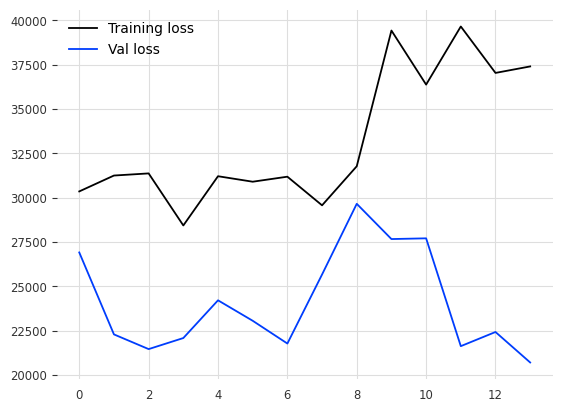

In [ ]:
plt.plot(lstm_history.history['loss'], label="Training loss")
plt.plot(lstm_history.history['val_loss'], label="Val loss")
plt.legend()

In [ ]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_lstm.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

10/10 [==============================] - 0s 21ms/step
Train rmse: 29050.46453631953
Validation rmse: 31916.725553593078


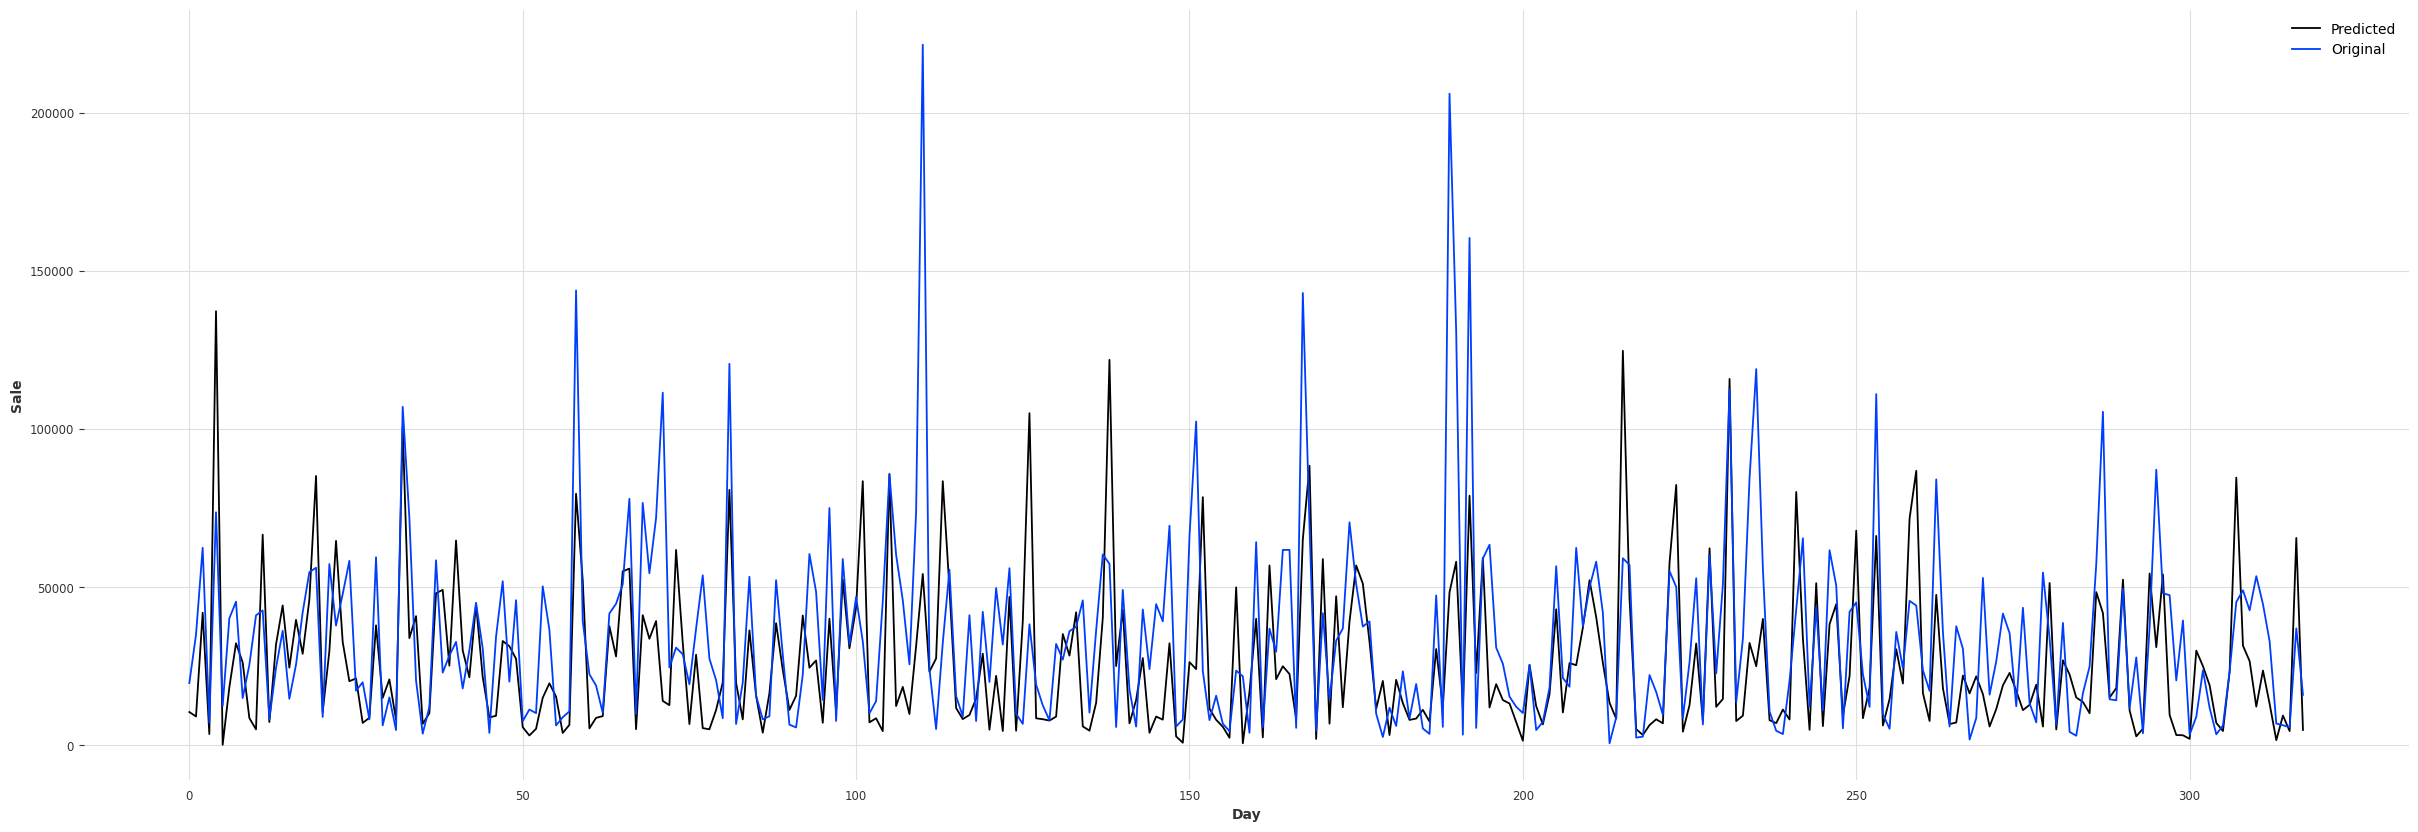

In [ ]:
length = len(lstm_valid_pred)
# data to be plotted
x = np.arange(0, length)
y1 = lstm_valid_pred[:length]
y2 = Y_valid[:length]

plt.figure(figsize=(30, 10))

# plotting
plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()